In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [4]:
y = df['label']
X = df.drop(labels='label', axis=1)
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


**Splitting the data into train, validation and test set**

In [5]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,random_state=42)  #divide the data into train and test set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)  # divide the train data into train and validation

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23625, 784)
(10500, 784)
(23625,)
(10500,)


In [7]:
# Load data into a tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

In [15]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,23625.0,23625.0,23625.0,23625.0,23625.0,23625.0,23625.0,23625.0,23625.0,23625.0,...,23625.000000,23625.000000,23625.000000,23625.000000,23625.000000,23625.000000,23625.0,23625.0,23625.0,23625.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.254603,0.122116,0.062180,0.028148,0.013376,0.002624,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.023422,4.337505,3.574267,2.231599,1.626740,0.403372,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,253.000000,244.000000,62.000000,0.0,0.0,0.0,0.0


**Simple DNN without any custom functions**

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) #to ensure reproducibilty of results

model = Sequential()

# Adding a lambda layer for standardization
model.add(Lambda(lambda x: (x/255.0), input_shape=X_train.shape[1:]))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.002),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

model.summary()

Epoch 1/5
739/739 [==============================] - 5s 5ms/step - loss: 0.3217 - accuracy: 0.9011 - val_loss: 0.1828 - val_accuracy: 0.9430
Epoch 2/5
739/739 [==============================] - 4s 5ms/step - loss: 0.1448 - accuracy: 0.9565 - val_loss: 0.1406 - val_accuracy: 0.9572
Epoch 3/5
739/739 [==============================] - 3s 4ms/step - loss: 0.1055 - accuracy: 0.9685 - val_loss: 0.1419 - val_accuracy: 0.9587
Epoch 4/5
739/739 [==============================] - 3s 5ms/step - loss: 0.0821 - accuracy: 0.9760 - val_loss: 0.1349 - val_accuracy: 0.9619
Epoch 5/5
739/739 [==============================] - 3s 4ms/step - loss: 0.0640 - accuracy: 0.9808 - val_loss: 0.1290 - val_accuracy: 0.9643
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Den

329/329 [==============================] - 1s 2ms/step - loss: 0.1386 - accuracy: 0.9624
Test loss: 0.13857512176036835
Test accuracy: 0.9623809456825256


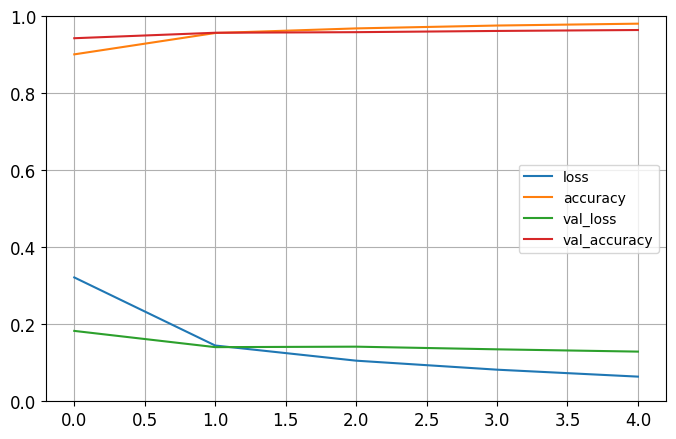

In [17]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trai

**Custom Activation Function**

In [30]:
from keras.layers import Layer
import keras.backend as K

class CustomActivation(Layer):
    def __init__(self, alpha=0.01, **kwargs):
        super(CustomActivation, self).__init__(**kwargs)
        self.alpha = K.cast_to_floatx(alpha)

    def call(self, inputs):
        return K.maximum(self.alpha * inputs, inputs)

    def get_config(self):
        config = {'alpha': float(self.alpha)}
        base_config = super(CustomActivation, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [33]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) #to ensure reproducibilty of results

model = Sequential()

# Adding a lambda layer for standardization
model.add(Lambda(lambda x: (x/255.), input_shape=X_train.shape[1:]))

model.add(Dense(256, activation=CustomActivation(alpha=0.001)))
model.add(Dense(128, activation=CustomActivation(alpha=0.001)))
model.add(Dense(64, activation=CustomActivation(alpha=0.001)))
model.add(Dense(32, activation=CustomActivation(alpha=0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.002),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

model.summary()

Epoch 1/5
739/739 [==============================] - 5s 5ms/step - loss: 0.3330 - accuracy: 0.8974 - val_loss: 0.1943 - val_accuracy: 0.9408
Epoch 2/5
739/739 [==============================] - 3s 5ms/step - loss: 0.1414 - accuracy: 0.9566 - val_loss: 0.1523 - val_accuracy: 0.9542
Epoch 3/5
739/739 [==============================] - 4s 5ms/step - loss: 0.0999 - accuracy: 0.9701 - val_loss: 0.1619 - val_accuracy: 0.9535
Epoch 4/5
739/739 [==============================] - 4s 5ms/step - loss: 0.0847 - accuracy: 0.9734 - val_loss: 0.1265 - val_accuracy: 0.9638
Epoch 5/5
739/739 [==============================] - 3s 5ms/step - loss: 0.0638 - accuracy: 0.9809 - val_loss: 0.1529 - val_accuracy: 0.9601
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Den

329/329 [==============================] - 1s 2ms/step - loss: 0.1535 - accuracy: 0.9608
Test loss: 0.15345187485218048
Test accuracy: 0.9607619047164917


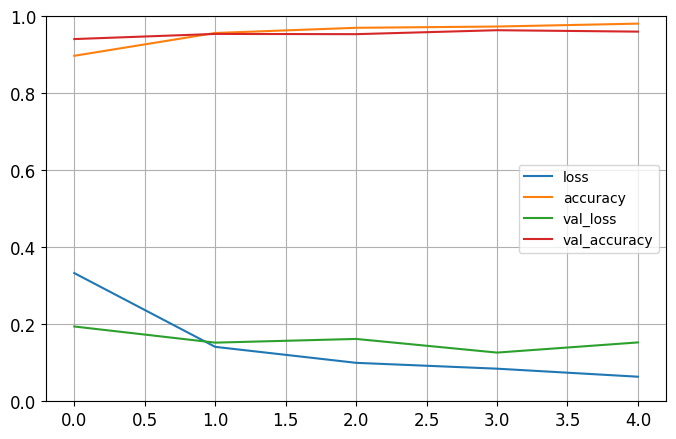

In [34]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Custom Initializer**

In [36]:
def custom_initializer(shape, dtype=None):
    return K.random_normal(shape, mean=0.0, stddev=0.05, dtype=dtype)

In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) #to ensure reproducibilty of results

model = Sequential()

# Adding a lambda layer for standardization
model.add(Lambda(lambda x: (x/255.), input_shape=X_train.shape[1:]))

model.add(Dense(512, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(256, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(128, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(64, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.002),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

model.summary()

Epoch 1/5
739/739 [==============================] - 7s 8ms/step - loss: 0.3106 - accuracy: 0.9038 - val_loss: 0.1673 - val_accuracy: 0.9505
Epoch 2/5
739/739 [==============================] - 6s 8ms/step - loss: 0.1410 - accuracy: 0.9578 - val_loss: 0.1480 - val_accuracy: 0.9573
Epoch 3/5
739/739 [==============================] - 6s 8ms/step - loss: 0.1047 - accuracy: 0.9688 - val_loss: 0.1327 - val_accuracy: 0.9627
Epoch 4/5
739/739 [==============================] - 6s 8ms/step - loss: 0.0841 - accuracy: 0.9762 - val_loss: 0.1216 - val_accuracy: 0.9684
Epoch 5/5
739/739 [==============================] - 6s 8ms/step - loss: 0.0681 - accuracy: 0.9805 - val_loss: 0.1451 - val_accuracy: 0.9637
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Den

329/329 [==============================] - 1s 2ms/step - loss: 0.1390 - accuracy: 0.9660
Test loss: 0.13900992274284363
Test accuracy: 0.9660000205039978


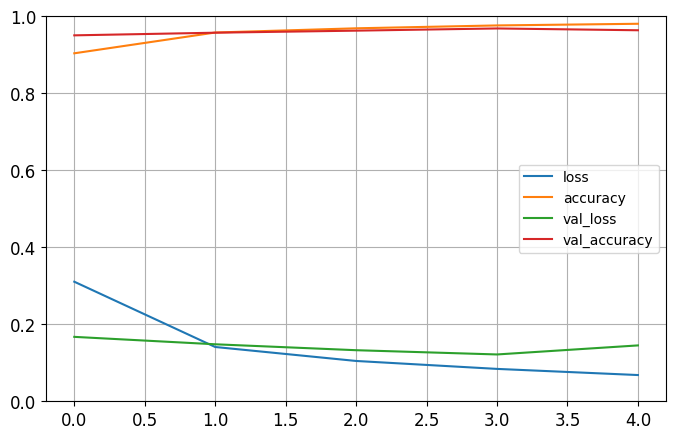

In [38]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Custom Regularizer**

In [56]:
# from keras.regularizers import Regularizer

# class CustomL1Regularizer(Regularizer):
#     def __init__(self, l=0.01):
#         self.l = K.cast_to_floatx(l)

#     def __call__(self, x):
#         return self.l * K.sum(K.abs(x))

#     def get_config(self):
#         return {'l': float(self.l)}

In [53]:
def custom_l2_regularizer(scale=1e-4):
    def regularizer(x):
        return K.sum(K.square(x)) * scale
    return regularizer

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) #to ensure reproducibilty of results

model = Sequential()

# Add a lambda layer for standardization
model.add(Lambda(lambda x: (x/255.), input_shape=X_train.shape[1:]))

model.add(Dense(512, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer, 
                        kernel_regularizer=custom_l2_regularizer(scale=1e-4)))
model.add(Dense(256, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(128, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(64, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(32, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.002),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

model.summary()

Epoch 1/5
739/739 [==============================] - 8s 9ms/step - loss: 0.4416 - accuracy: 0.8861 - val_loss: 0.2660 - val_accuracy: 0.9421
Epoch 2/5
739/739 [==============================] - 6s 9ms/step - loss: 0.2519 - accuracy: 0.9512 - val_loss: 0.2424 - val_accuracy: 0.9548
Epoch 3/5
739/739 [==============================] - 6s 9ms/step - loss: 0.2186 - accuracy: 0.9629 - val_loss: 0.2441 - val_accuracy: 0.9549
Epoch 4/5
739/739 [==============================] - 6s 9ms/step - loss: 0.1977 - accuracy: 0.9673 - val_loss: 0.2336 - val_accuracy: 0.9599
Epoch 5/5
739/739 [==============================] - 6s 9ms/step - loss: 0.1762 - accuracy: 0.9742 - val_loss: 0.2102 - val_accuracy: 0.9661
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Den

329/329 [==============================] - 1s 3ms/step - loss: 0.2159 - accuracy: 0.9659
Test loss: 0.2158602625131607
Test accuracy: 0.9659047722816467


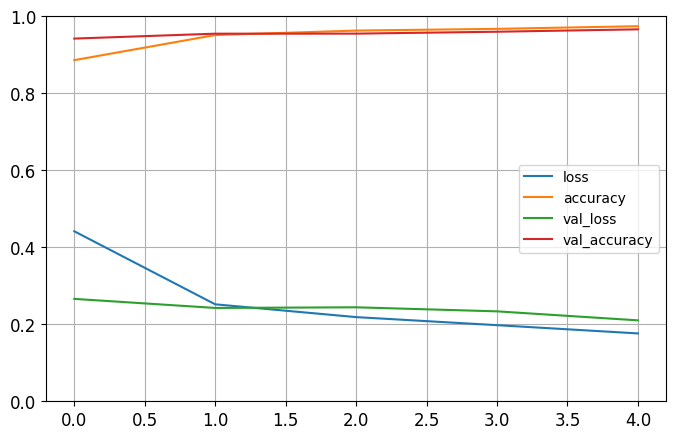

In [55]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Constraint**
- Adding a constraint that keeps the weights always positive

In [57]:
def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) #to ensure reproducibilty of results

model = Sequential()

# Add a lambda layer for standardization
model.add(Lambda(lambda x: (x/255.), input_shape=X_train.shape[1:]))

model.add(Dense(512, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer, 
                        kernel_regularizer=custom_l2_regularizer(scale=1e-4)))
model.add(Dense(256, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(128, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(64, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(32, activation=CustomActivation(alpha=0.001), kernel_initializer=custom_initializer))
model.add(Dense(10, activation='softmax', kernel_constraint=my_positive_weights))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.002),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

model.summary()

Epoch 1/5
739/739 [==============================] - 8s 9ms/step - loss: 0.4753 - accuracy: 0.8729 - val_loss: 0.2943 - val_accuracy: 0.9345
Epoch 2/5
739/739 [==============================] - 6s 9ms/step - loss: 0.2580 - accuracy: 0.9503 - val_loss: 0.2458 - val_accuracy: 0.9523
Epoch 3/5
739/739 [==============================] - 6s 8ms/step - loss: 0.2199 - accuracy: 0.9615 - val_loss: 0.2861 - val_accuracy: 0.9464
Epoch 4/5
739/739 [==============================] - 6s 8ms/step - loss: 0.2035 - accuracy: 0.9662 - val_loss: 0.2163 - val_accuracy: 0.9632
Epoch 5/5
739/739 [==============================] - 6s 8ms/step - loss: 0.1882 - accuracy: 0.9707 - val_loss: 0.2166 - val_accuracy: 0.9663
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Den

329/329 [==============================] - 1s 2ms/step - loss: 0.2196 - accuracy: 0.9662
Test loss: 0.2195829600095749
Test accuracy: 0.9661904573440552


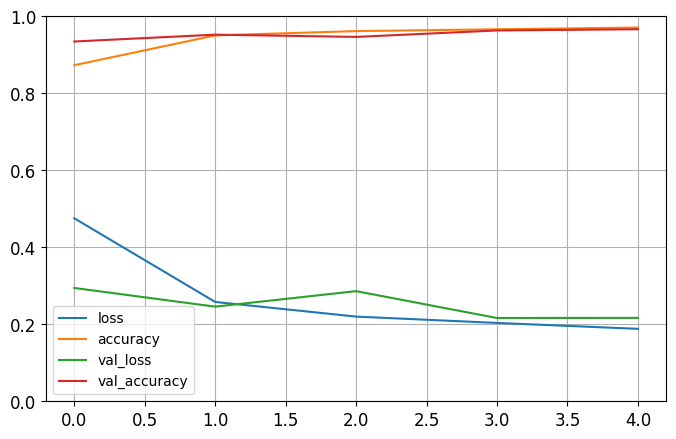

In [59]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**CNN**

In [60]:
def reshape_and_normalize(images):
    # Reshape the images to add an extra dimension
    images = images.reshape(-1, 28, 28, 1)
  
    return images

In [62]:
X_train_cnn = reshape_and_normalize(X_train.values)
X_valid_cnn = reshape_and_normalize(X_valid.values)
X_test_cnn = reshape_and_normalize(X_test.values)

In [63]:
X_train_cnn.shape

(23625, 28, 28, 1)

In [65]:
from keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) #to ensure reproducibilty of results

# Create a Keras model
model = Sequential()

model.add(Lambda(lambda x: (x/255.0), input_shape=(28,28,1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.002),
              metrics=["accuracy"])

history = model.fit(X_train_cnn, y_train, epochs=5,
                    validation_data=(X_valid_cnn, y_valid))

model.summary()

Epoch 1/5
739/739 [==============================] - 17s 22ms/step - loss: 0.3601 - accuracy: 0.8799 - val_loss: 0.1419 - val_accuracy: 0.9564
Epoch 2/5
739/739 [==============================] - 16s 21ms/step - loss: 0.1202 - accuracy: 0.9630 - val_loss: 0.1075 - val_accuracy: 0.9691
Epoch 3/5
739/739 [==============================] - 14s 19ms/step - loss: 0.0886 - accuracy: 0.9720 - val_loss: 0.0948 - val_accuracy: 0.9741
Epoch 4/5
739/739 [==============================] - 15s 20ms/step - loss: 0.0749 - accuracy: 0.9778 - val_loss: 0.1188 - val_accuracy: 0.9697
Epoch 5/5
739/739 [==============================] - 14s 19ms/step - loss: 0.0638 - accuracy: 0.9812 - val_loss: 0.0829 - val_accuracy: 0.9780
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 28, 28, 1)         0         
                                                                 
 

329/329 [==============================] - 2s 6ms/step - loss: 0.0773 - accuracy: 0.9791
Test loss: 0.07725237309932709
Test accuracy: 0.9791428446769714


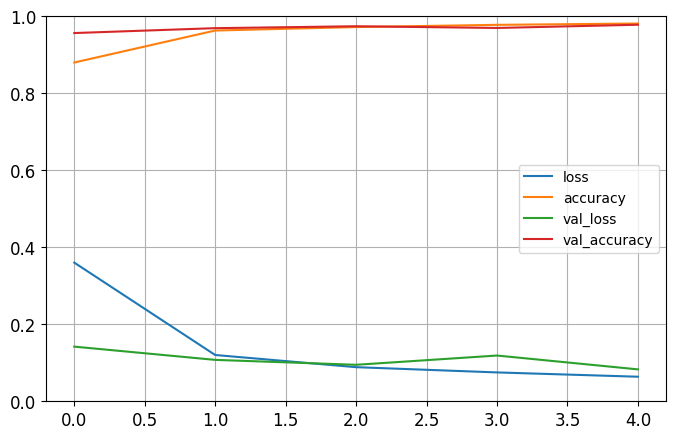

In [67]:
score = model.evaluate(X_test_cnn, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**CNN model 2**

In [75]:
from keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) #to ensure reproducibilty of results

model = Sequential()

model.add(Lambda(lambda x: (x/255.0), input_shape=(28,28,1)))

model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='glorot_uniform'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2)) 
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.002),
              metrics=["accuracy"])

history = model.fit(X_train_cnn, y_train, epochs=10,
                    validation_data=(X_valid_cnn, y_valid))

model.summary()

Epoch 1/10
739/739 [==============================] - 20s 25ms/step - loss: 0.2553 - accuracy: 0.9255 - val_loss: 0.1238 - val_accuracy: 0.9667
Epoch 2/10
739/739 [==============================] - 19s 25ms/step - loss: 0.1042 - accuracy: 0.9715 - val_loss: 0.0878 - val_accuracy: 0.9752
Epoch 3/10
739/739 [==============================] - 20s 27ms/step - loss: 0.0804 - accuracy: 0.9790 - val_loss: 0.0826 - val_accuracy: 0.9759
Epoch 4/10
739/739 [==============================] - 18s 25ms/step - loss: 0.0633 - accuracy: 0.9825 - val_loss: 0.0971 - val_accuracy: 0.9746
Epoch 5/10
739/739 [==============================] - 19s 25ms/step - loss: 0.0598 - accuracy: 0.9830 - val_loss: 0.0689 - val_accuracy: 0.9834
Epoch 6/10
739/739 [==============================] - 18s 25ms/step - loss: 0.0575 - accuracy: 0.9851 - val_loss: 0.0770 - val_accuracy: 0.9817
Epoch 7/10
739/739 [==============================] - 20s 27ms/step - loss: 0.0490 - accuracy: 0.9876 - val_loss: 0.0744 - val_accuracy:

329/329 [==============================] - 2s 7ms/step - loss: 0.0690 - accuracy: 0.9836
Test loss: 0.06897715479135513
Test accuracy: 0.9836190342903137


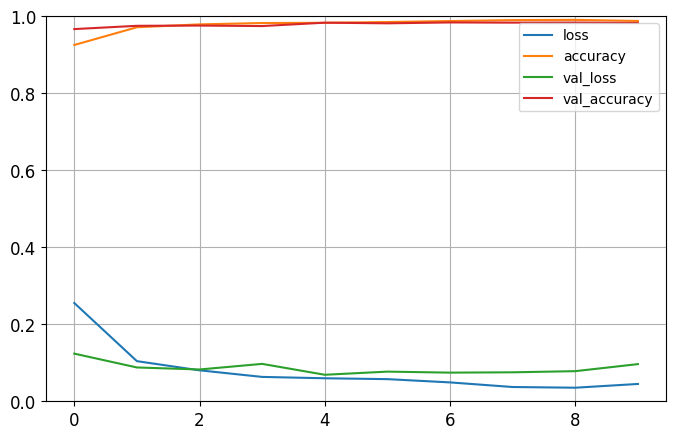

In [76]:
score = model.evaluate(X_test_cnn, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Make a submission in the Kaggle competition**

In [77]:
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_df.shape

(28000, 784)

In [78]:
X_TEST_cnn = reshape_and_normalize(test_df.values)

In [79]:
X_TEST_cnn.shape

(28000, 28, 28, 1)

In [80]:
y_test_pred = model.predict(X_TEST_cnn)

875/875 [==============================] - 6s 7ms/step


In [81]:
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

In [82]:
y_test_pred_classes.shape

(28000,)

In [83]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(y_test_pred_classes) + 1),
    "Label": y_test_pred_classes
})

submission.to_csv("submission.csv", index=False)